# ★원점을 지나는 회귀방정식★   
#### 일반적으로 회귀모델에서는 '상수항'을 포함해야한다.
#### 그러나 사망자수, 중상자수, 경상자수, 부상신고자수 로 구성된 EPDO 값 특성상  사고가 발생하지 않으면 EPDO의 값은 0이 도출된다.
#### 따라서 독립변수들의 계수가 0이면 (사고가 발생하지 않으면) 종속변수의 값도 0이 되어야 하므로 원점을 지나는 회귀모델을 사용하겠다.

In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import statsmodels.api as sm

In [3]:
df=pd.read_csv('C:/Users/user/TEST3/csv파일/데이터셋_4(심각도).csv',encoding='cp949')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27284 entries, 0 to 27283
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고유형        27284 non-null  object
 1   연령가해자       27284 non-null  object
 2   법규위반가해자     27284 non-null  object
 3   행동유형가해자     27284 non-null  object
 4   피해자신체상해주부위  27284 non-null  object
 5   차량용도가해자     27284 non-null  object
 6   도로종류        27284 non-null  object
 7   도로형태        27284 non-null  object
 8   도로선형        27284 non-null  object
 9   발생시각        27284 non-null  object
 10  심각도         27284 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 2.3+ MB


# 전체 변수들과의 ols 회귀분석 진행
### 설명변수(X)와 타겟변수(Y)를 분리/학습데이터와 평가데이터를 분할
##### Split Data Set Shape 출력물

In [38]:
y=df['심각도']

In [6]:
feature_columns = df.columns.difference(["심각도"]) # Target column 빼기

X=df.drop(['심각도'],axis=1)
X=pd.get_dummies(X,drop_first=True)
y=pd.DataFrame(df['심각도'])

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(19098, 35) (8186, 35) (19098, 1) (8186, 1)


# 1.1) train & OLS 회귀모델 적합
###  ▶ R-squared(설명력): 74.9%
###  ▶ AIC: 2182e+04

In [7]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.749
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              1629.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:22:01   Log-Likelihood:                         -10873.
No. Observations:               19098   AIC:                                  2.182e+04
Df Residuals:                   19063   BIC:                                  2.209e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.0498      0.020      2.548      0.011       0.011       0.088
사고유형_차도통행중         0.0486      0.013      3.737      0.000       0.023       0.074
사고유형_횡단중           0.0958      0.011      8.531      0.000       0.074       0.118
연령가해자_21-30세       0.0020      0.024      0.086      0.932      -0.045       0.049
연령가해자_31-40세       0.0057      0.023      0.242      0.809      -0.040       0.052
연령가해자_41-50세       0.0112      0.023      0.486      0.627      -0.034       0.056
연령가해자_51-60세      -0.0038      0.023     -0.166      0.868      -0.049       0.041
연령가해자_61-64세       0.0086      0.025      0.350      0.726      -0.040       0.057
연령가해자_65세이상       -0.0051      0.023     -0.219      0.827      -0.051       0.041
법규위반가해자_그룹2        0.0152      0.007      2.058      0.040       0.001       0.030
법규위반가해자_그룹3        0.1592      0.034      4.736      0.000       0.093       0.225
행동유형가해자_그룹2        0.0940      0.014      6.563      0.000       0.066       0.122
행동유형가해자_그룹3        0.0498      0.015      3.308      0.001       0.020       0.079
행동유형가해자_그룹4       -0.0403      0.058     -0.691      0.490      -0.155       0.074
피해자신체상해주부위_그룹2     0.1244      0.063      1.970      0.049       0.001       0.248
피해자신체상해주부위_그룹3     0.2556      0.063      4.081      0.000       0.133       0.378
피해자신체상해주부위_그룹4     0.3364      0.063      5.377      0.000       0.214       0.459
피해자신체상해주부위_그룹5     0.3927      0.063      6.279      0.000       0.270       0.515
피해자신체상해주부위_그룹6     0.4664      0.063      7.376      0.000       0.342       0.590
차량용도가해자_그룹2       -0.0312      0.018     -1.735      0.083      -0.066       0.004
차량용도가해자_그룹3       -0.0650      0.015     -4.376      0.000      -0.094      -0.036
차량용도가해자_그룹4       -0.0389      0.007     -5.320      0.000      -0.053      -0.025
차량용도가해자_그룹5       -0.2185      0.027     -8.107      0.000      -0.271      -0.166
도로종류_군도            0.3141      0.068      4.615      0.000       0.181       0.447
도로종류_시도            0.2764      0.067      4.111      0.000       0.145       0.408
도로종류_일반국도          0.3378      0.068      4.950      0.000       0.204       0.472
도로종류_지방도           0.3121      0.068      4.594      0.000       0.179       0.445
도로종류_특별광역시도        0.2590      0.067      3.857      0.000       0.127       0.391
도로형태_단일로           0.0002      0.007      0.031      0.975      -0.014       0.014
도로형태_주차장          -0.0310      0.069     -0.448      0.654      -0.166       0.105
도로선형_오르막          -0.0159      0.018     -0.882      0.378      -0.051       0.019
도로선형_평지           -0.0351      0.013     -2.694      0.007      -0.061      -0.010
발생시각_새벽~아침         0.1010      0.010     10.120      0.000       0.081       0.

# 1.2) P_value > 0.05인 컬럼 삭제 

In [10]:
X = X.drop(['연령가해자_21-30세','연령가해자_31-40세','연령가해자_41-50세','연령가해자_51-60세','연령가해자_61-64세'
           ,'연령가해자_65세이상','행동유형가해자_그룹4','차량용도가해자_그룹2','도로형태_단일로','도로형태_주차장'
           ,'도로선형_오르막'],axis=1)

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(19098, 24) (8186, 24) (19098, 1) (8186, 1)


# 1.3) OLS 회귀 재진행

In [12]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              2404.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:34:48   Log-Likelihood:                         -10823.
No. Observations:               19098   AIC:                                  2.169e+04
Df Residuals:                   19074   BIC:                                  2.188e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.0757      0.020      3.864      0.000       0.037       0.114
사고유형_차도통행중         0.0616      0.013      4.731      0.000       0.036       0.087
사고유형_횡단중           0.1037      0.011      9.322      0.000       0.082       0.126
법규위반가해자_그룹2        0.0170      0.007      2.322      0.020       0.003       0.031
법규위반가해자_그룹3        0.1753      0.033      5.351      0.000       0.111       0.240
행동유형가해자_그룹2        0.0719      0.014      5.201      0.000       0.045       0.099
행동유형가해자_그룹3        0.0378      0.014      2.643      0.008       0.010       0.066
피해자신체상해주부위_그룹2     0.2334      0.063      3.681      0.000       0.109       0.358
피해자신체상해주부위_그룹3     0.3692      0.063      5.871      0.000       0.246       0.492
피해자신체상해주부위_그룹4     0.4543      0.063      7.231      0.000       0.331       0.577
피해자신체상해주부위_그룹5     0.5059      0.063      8.052      0.000       0.383       0.629
피해자신체상해주부위_그룹6     0.5840      0.064      9.196      0.000       0.460       0.709
차량용도가해자_그룹3       -0.0504      0.014     -3.645      0.000      -0.078      -0.023
차량용도가해자_그룹4       -0.0357      0.007     -5.207      0.000      -0.049      -0.022
차량용도가해자_그룹5       -0.1762      0.025     -6.926      0.000      -0.226      -0.126
도로종류_군도            0.2027      0.065      3.113      0.002       0.075       0.330
도로종류_시도            0.1660      0.064      2.579      0.010       0.040       0.292
도로종류_일반국도          0.2230      0.065      3.414      0.001       0.095       0.351
도로종류_지방도           0.1987      0.065      3.052      0.002       0.071       0.326
도로종류_특별광역시도        0.1472      0.064      2.291      0.022       0.021       0.273
도로선형_평지           -0.0315      0.010     -3.312      0.001      -0.050      -0.013
발생시각_새벽~아침         0.1022      0.010     10.341      0.000       0.083       0.122
발생시각_저녁~자정         0.0311      0.011      2.941      0.003       0.010       0.052
발생시각_출퇴근시간         0.0378      0.007      5.232      0.000       0.024       0.052
==============================================================================
Omnibus:                     3364.185   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3248.454
Skew:                          -0.937   Prob(JB):                         0.00
Kurtosis:                       2.244   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.4) 다중공선성 검사

## 출력된 VIF Factor 값이 10크면 다중공선성이 있다는 것이다.

In [13]:
corolla = pd.concat([train_x,train_y],axis=1)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corolla.values, i) for i in range(corolla.shape[1])]
vif["features"] = corolla.columns
vif

,VIF Factor,features
0,1.435023,사고유형_보도통행중
1,2.531647,사고유형_차도통행중
2,9.503647,사고유형_횡단중
3,1.697384,법규위반가해자_그룹2
4,1.033395,법규위반가해자_그룹3
5,12.191825,행동유형가해자_그룹2
6,7.208164,행동유형가해자_그룹3
7,38.191215,피해자신체상해주부위_그룹2
8,95.315346,피해자신체상해주부위_그룹3
9,130.806324,피해자신체상해주부위_그룹4


### ▶ y 예측값
####  → 소수 첫째자리에서 반올림해서 나타내겠음 

In [15]:
pred_y = fitted_full_model.predict(test_x)
pred_y = pd.DataFrame(pred_y)
pred_y.rename(columns ={0:'y예측'},inplace=True)

for i in range(len(pred_y)):
     pred_y.iloc[i] = int(pred_y.iloc[i])
     pred_y.iloc[i] =  round(pred_y.iloc[i],0)

In [16]:
pred_y

,y예측
11949,0.0
23742,0.0
26398,0.0
13450,0.0
22736,0.0
...,...
5293,0.0
10847,0.0
4376,0.0
17657,0.0


In [18]:
cnt = pred_y['y예측'].value_counts()
cnt = pd.DataFrame(cnt)
cnt.transpose()

,0.0,1.0
y예측,8135,51


(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

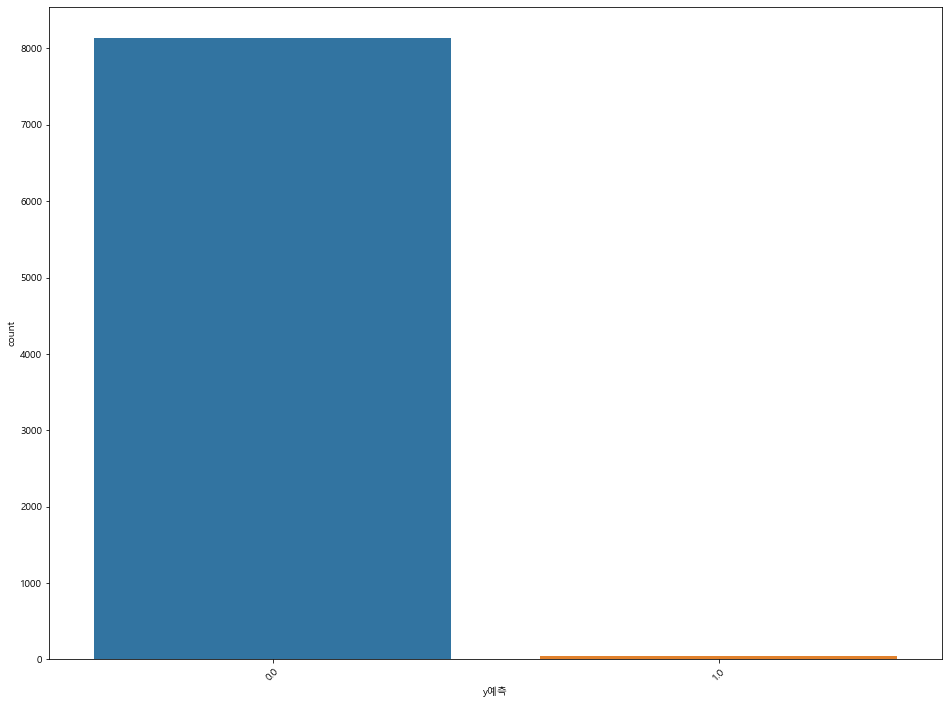

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
sns.countplot(data=pred_y, x="y예측", ax=ax1)
plt.xticks(rotation=45)

---

---

---

# ■ ols 모델에서 중요 변수를 선택하는 과정을 수행해보자

# 0.변수선택법

In [34]:
feature_columns = train_x.columns.difference(["심각도"])

In [35]:
#변수 선택법
def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
print(processSubset(x=train_x,y=train_y,feature_set=feature_columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED02C57EE0>, 'AIC': 21694.53823252237}


In [36]:
#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['사고유형_보도통행중']),k): 
        combo=(list(combo)+['사고유형_보도통행중'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel

In [37]:
print(getBest(x=train_x,y=train_y,k=2))

Processed 253 models on 2 predictors in 3.580430507659912 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                25143.3
Name: 252, dtype: object


In [38]:
#변수 선택에 따른 학습시간과 저장 K 반복
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,5):
    models.loc[i] = getBest(train_x,train_y,i)
 
toc = time.time()
print("Total elapsed time : ",(toc-tic),"seconds")
 
print(models)

Processed 23 models on 1 predictors in 0.28862547874450684 seconds.
Processed 253 models on 2 predictors in 3.4221227169036865 seconds.
Processed 1771 models on 3 predictors in 23.33301043510437 seconds.
Processed 8855 models on 4 predictors in 214.17729473114014 seconds.
Total elapsed time :  251.85013794898987 seconds
            AIC                                              model
1  28919.867076  <statsmodels.regression.linear_model.Regressio...
2  25143.307161  <statsmodels.regression.linear_model.Regressio...
3  24571.405682  <statsmodels.regression.linear_model.Regressio...
4  23999.889367  <statsmodels.regression.linear_model.Regressio...


In [40]:
models.loc[4,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              9776.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:51:58   Log-Likelihood:                         -11995.
No. Observations:               19098   AIC:                                  2.400e+04
Df Residuals:                   19093   BIC:                                  2.404e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형_차도통행중      0.2943      0.012     24.126      0.000       0.270       0.318
사고유형_횡단중        0.3362      0.010     34.279      0.000       0.317       0.355
행동유형가해자_그룹2     0.4553      0.010     47.494      0.000       0.437       0.474
행동유형가해자_그룹3     0.4036      0.011     37.983      0.000       0.383       0.424
사고유형_보도통행중      0.3158      0.019     16.399      0.000       0.278       0.354
==============================================================================
Omnibus:                     2320.819   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2575.474
Skew:                          -0.852   Prob(JB):                         0.00
Kurtosis:                       2.421   Cond. No.                         7.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.전진선택법

In [41]:
#전진 선택법(Step=1)
 
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['사고유형_보도통행중'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['사고유형_보도통행중']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['사고유형_보도통행중']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != '사고유형_보도통행중']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])
 
forwordBestModel=forward_model(train_x,train_y)
 
print(forwordBestModel.summary())

Processed  23 models on 1 predictors in 0.3579521179199219
Selected predictors: ['도로선형_평지', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EBB3190>
Processed  22 models on 2 predictors in 0.3871941566467285
Selected predictors: ['도로선형_평지', '사고유형_횡단중', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EB9F670>
Processed  21 models on 3 predictors in 0.3368954658508301
Selected predictors: ['도로선형_평지', '사고유형_횡단중', '사고유형_차도통행중', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EB96C10>
Processed  20 models on 4 predictors in 0.34892749786376953
Selected predictors: ['도로선형_평지', '사고유형_횡단중', '사고유형_차도통행중', '행동유형가해자_그룹2', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EB84D90>
Processed  19 models on 5 predictors in 0.4345822334289551
Selected predictors: ['도로선형_평지', '사고유형_횡단

# 2.후진제거법

In [42]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['사고유형_보도통행중']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['사고유형_보도통행중'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != '사고유형_보도통행중']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])
 
backwardBestModel = backword_model(train_x,train_y)
print(backwardBestModel.summary())

Processed 23 models on 22 predictors in 1.217254638671875
Selected predictors : ['도로선형_평지', '도로종류_군도', '도로종류_시도', '도로종류_일반국도', '도로종류_지방도', '발생시각_새벽~아침', '발생시각_저녁~자정', '발생시각_출퇴근시간', '법규위반가해자_그룹2', '법규위반가해자_그룹3', '사고유형_차도통행중', '사고유형_횡단중', '차량용도가해자_그룹3', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹4', '피해자신체상해주부위_그룹5', '피해자신체상해주부위_그룹6', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '사고유형_보도통행중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EB6F310>
Processed 22 models on 21 predictors in 1.1064426898956299
Selected predictors : ['도로선형_평지', '도로종류_군도', '도로종류_시도', '도로종류_일반국도', '도로종류_지방도', '발생시각_새벽~아침', '발생시각_저녁~자정', '발생시각_출퇴근시간', '법규위반가해자_그룹3', '사고유형_차도통행중', '사고유형_횡단중', '차량용도가해자_그룹3', '차량용도가해자_그룹4', '차량용도가해자_그룹5', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹4', '피해자신체상해주부위_그룹5', '피해자신체상해주부위_그룹6', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '사고유형_보도통행중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000

# 3.단계적선택법

In [43]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['사고유형_보도통행중'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['사고유형_보도통행중']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != '사고유형_보도통행중']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != '사고유형_보도통행중']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 
stepwiseBestModel = Stepwise_model(train_x,train_y)
print(stepwiseBestModel.summary())

Processed  23 models on 1 predictors in 0.31784510612487793
Selected predictors: ['도로선형_평지', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EB7A0D0>
forward
Processed 1 models on 0 predictors in 0.012032747268676758
Selected predictors : ['사고유형_보도통행중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EB9F5B0>
Processed  22 models on 2 predictors in 0.3635091781616211
Selected predictors: ['도로선형_평지', '사고유형_횡단중', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EBC59D0>
forward
Processed 2 models on 1 predictors in 0.04110860824584961
Selected predictors : ['도로선형_평지', '사고유형_보도통행중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EB7AFD0>
Processed  21 models on 3 predictors in 0.37549829483032227
Selected predictors: ['도로선형_평지', '사고유형_횡단중', '사고유형_차도통행중', '사고유형_보도통행중'] AIC :  <statsmodels.regression

Processed  9 models on 15 predictors in 0.3102266788482666
Selected predictors: ['도로선형_평지', '사고유형_횡단중', '사고유형_차도통행중', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹6', '피해자신체상해주부위_그룹5', '피해자신체상해주부위_그룹4', '피해자신체상해주부위_그룹3', '발생시각_새벽~아침', '차량용도가해자_그룹5', '법규위반가해자_그룹3', '도로종류_특별광역시도', '도로종류_시도', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EB96E80>
forward
Processed 15 models on 14 predictors in 0.5155191421508789
Selected predictors : ['사고유형_횡단중', '사고유형_차도통행중', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹6', '피해자신체상해주부위_그룹5', '피해자신체상해주부위_그룹4', '피해자신체상해주부위_그룹3', '발생시각_새벽~아침', '차량용도가해자_그룹5', '법규위반가해자_그룹3', '도로종류_특별광역시도', '도로종류_시도', '사고유형_보도통행중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EBB3F70>
Processed  8 models on 16 predictors in 0.2674520015716553
Selected predictors: ['도로선형_평지', '사고유형_횡단중', '사고유형_차도통행중', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '피해자신체상해주부위_그

---

---